<a href="https://colab.research.google.com/github/rosarm00/MLUCM2223/blob/main/PR%C3%81CTICA_FINAL_ML_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PRÁCTICA FINAL MACHINE LEARNING**

Victoria Flores Caro, Rosa Ramos Mora, Marina Sánchez Sánchez

# **1. TAREA CAMPUS VIRTUAL**
  1.     Dataset: https://www.kaggle.com/datasets/tbsteal/canadian-car-accidents-19942014?select=drivingLegend.pdf  NCDB_1999_to_2014.csv

  2.     ¿Qué tipos de vehículos (modelos, antigüedad, etc.) y conductores son más propensos a tener accidentes (acción correctiva en prima)?

  3.      ¿Qué tipos de vehículos (modelos, antigüedad, etc.) y conductores son menos propensos a tener accidentes (descuento en prima)?

  4.     ¿Qué es lo que más contribuye a que existan fallecimientos en un accidente?

  5.     Dado un accidente, ¿se puede generar un modelo que prediga si habrá fallecimientos o no? ¿Si se va a necesitar tratamiento médico o no? Las aseguradoras tienen que inmovilizar capital para pagar estas casuísticas. 

  6.     Libertad para generar análisis de valor y nuevas ideas. Se debe atacar mínimo un modelo (estimar si habrá fallecidos o no). Hecho esto, se puede plantear de forma opcional otros alcances (libertad para plantear opciones). 

  7.     Plus: complementar con datos abiertos de clima (aunque Canadá es muy grande) y de otra tipología, ¿hay algún tipo de relación con temperaturas medias, precipitación media del día/mes, nieve...? ¿a más días festivos o de vacaciones, más accidentes? etc. 

**Tareas** 

Se valorará:
- Generación de nuevas características a partir de las existentes
- Codificación de variables - Se valorará el uso de técnicas no supervisadas para enriquecer el dataset y el análisis exploratorio.
- Análisis exploratorio
- Selección y evaluación del modelo
- Explicabilidad del modelo - como extra
- Comparativa de distintos algoritmos

Importamos los **paquetes** necesarios para llevar a cabo esta práctica

In [ ]:
%matplotlib inline

from statistics import mean
import pandas as pd
import numpy as np
import math
import random

import imblearn
from imblearn.over_sampling import RandomOverSampler

import matplotlib.pyplot as plt
from matplotlib import style
import plotly.express as px
import seaborn as sns

import scipy
from scipy import stats

import sklearn 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import neighbors
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score, mean_squared_error,confusion_matrix, recall_score,f1_score, precision_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

from collections import Counter


In [ ]:
%run -i funciones_auxiliares.py
import funciones_auxiliares 

# **2. OBJETIVOS**
Según datos de la DGT, en 2022 se produjeron 1.042 siniestros mortales en las carreteras españolas en los que fallecieron 1.145 personas y otras 4.008 resultaron heridas graves. Estas cifras representan 44 fallecidos más (+4 %) y 425 heridos graves menos (-10 %) que en 2019, año de referencia y previo a la pandemia.

Existen múltiples factores que contribuyen a estos accidentes, entre ellos la conducción imprudente, las condiciones climáticas adversas, la falta de señalización vial y la falta de distancia adecuada entre vehículos.

Al analizar los datos, se destaca lo siguiente sobre los accidentes de tráfico que resultan en fallecimientos:

- Por tipo de vía: se observa una mayor gravedad en los accidentes que ocurren en vías no autorizadas, excluyendo autopistas y autovías.

- Por género: los hombres tienden a estar involucrados en colisiones más graves, lo que se traduce en lesiones y muertes más frecuentes en comparación con las mujeres.

- Por grupos de edad: las franjas de edad más afectadas por la mortalidad en accidentes de tráfico son aquellas comprendidas entre los 35 y los 54 años.

- Día de la semana: los fines de semana (desde las 15:00 h. del viernes hasta las 24:00 h. del domingo) se registran más accidentes mortales en comparación con los días laborables (desde las 00:00 h. del lunes hasta las 14:59 h. del viernes).

Con el objetivo de abordar esta problemática, se propone emplear algoritmos de Machine Learning y técnicas de clasificación para detectar víctimas mortales en accidentes de tráfico. Se analizarán diversas características relacionadas con las condiciones del suceso, los vehículos involucrados y las personas afectadas.

Este estudio busca identificar las variables más influyentes en los fallecimientos en accidentes de tráfico y validar las hipótesis presentadas por la Dirección General de Tráfico. Además, se espera que estos hallazgos ayuden a mejorar los planes de acción de los servicios de emergencia, a definir coberturas de seguros más adecuadas para diferentes tipos de vehículos y a enfocar las campañas de seguridad vial de la DGT en los aspectos más relevantes para reducir la mortalidad en las carreteras.

# **3. ANÁLISIS EXPLORATORIO DE LOS DATOS**

## 3.1 Lectura de datos

Usaremos la base de datos "NCDB_1999_to_2014.csv", donde se proporciona información sobre colisiones en accidentes automovilísticos en Canadá entre 1999 y 2014, proporcionada por Transport Canada. El conjunto de datos incluye características como la hora del día, si hubo o no víctimas mortales, género del conductor, entre otros. Desafortunadamente, características como la ubicación y la conducción bajo los efectos del alcohol no forman parte de este conjunto de características, pero hay muchas otras con las que trabajar.




In [ ]:
df_original = pd.read_csv("NCDB_1999_to_2014.csv", sep = ',')
df_original

<ipython-input-3-e9d1e6873e13>:1: DtypeWarning: Columns (1,2,5,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original = pd.read_csv("NCDB_1999_to_2014.csv", sep = ',')


,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,1999,1,1,20,2,02,34,UU,1,5,...,01,06,1990,01,M,41,11,1,UU,1
1,1999,1,1,20,2,02,34,UU,1,5,...,02,01,1987,01,M,19,11,1,UU,1
2,1999,1,1,20,2,02,34,UU,1,5,...,02,01,1987,02,F,20,13,2,02,2
3,1999,1,1,08,2,01,01,UU,5,3,...,01,01,1986,01,M,46,11,1,UU,1
4,1999,1,1,08,2,01,01,UU,5,3,...,99,NN,NNNN,01,M,05,99,2,UU,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860400,2014,UU,U,UU,2,UU,UU,01,U,U,...,13,07,UUUU,01,M,24,11,1,NN,1
5860401,2014,UU,U,23,2,01,06,05,1,1,...,1,14,2006,01,M,29,96,2,09,5
5860402,2014,UU,U,14,2,01,02,01,1,5,...,1,01,2006,01,F,UU,11,2,01,1
5860403,2014,UU,U,22,1,01,06,01,2,4,...,1,22,UUUU,01,M,67,12,3,01,U


In [ ]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5860405 entries, 0 to 5860404
Data columns (total 22 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   C_YEAR  int64 
 1   C_MNTH  object
 2   C_WDAY  object
 3   C_HOUR  object
 4   C_SEV   int64 
 5   C_VEHS  object
 6   C_CONF  object
 7   C_RCFG  object
 8   C_WTHR  object
 9   C_RSUR  object
 10  C_RALN  object
 11  C_TRAF  object
 12  V_ID    object
 13  V_TYPE  object
 14  V_YEAR  object
 15  P_ID    object
 16  P_SEX   object
 17  P_AGE   object
 18  P_PSN   object
 19  P_ISEV  object
 20  P_SAFE  object
 21  P_USER  object
dtypes: int64(2), object(20)
memory usage: 983.6+ MB


Observamos que la mayoría de nuestros datos son categóricos, por lo que concluimos que estamos ante un problema de clasificación.
Además, en ña tabla anterior observamos que algunos datos no son numéricos sino que contienen en su lugar una o varias letras. Para analizarlos, en primer lugar hacemos uso de la leyenda facilitada para ver qué hacemos con ellos y cómo podemos tratarlos o eliminarlos si hiciera falta. 

In [ ]:
#Vemos si tenemos datos duplicados en nuestra base de datos
duplicated_rows_df = df_original[df_original.duplicated()]
print(f"numero de duplicados: {duplicated_rows_df.shape}")

numero de duplicados: (5069, 22)


Observamos que tenemos 230 datos duplicados, pero como nuestra muestra está compuesta casi en su totalidad de variables categóricas, eliminarlos puede ser un error ya que pueden contener información relevante y podemos tener una pérdida de información.

## 3.2 Leyenda
Como venismo adelantando,en la tabla anterior, no todos los valores proporcionados en la base de datos son números, también aparecen letras. Debemos saber cuál es su significado para así tratar de forma adecuada los datos. 
Para ello hacemos uso del PDF que acompaña a esta base de datos, llamado drivingLegend, donde se explica el significado de cada variable. 

- "U"/"UU"/"UUUU": "Desconocido"
- "X"/"XX"/"XXXX": "La jurisdicción no aporta el dato"
- "Q"/"QQ": "Otra respuesta diferente a las opciones propuestas"
- "N"/"NN"/"NNNN": "Elemento de dato no aplicable"

Después de ver esta leyenda, podríamos decir que la base de datos no contiene valores "missing", ya que los datos que no están recogidos llevan la etiqueta "U"/"UU"/"UUUU" o "X"/"XX"/"XXXX".
Para no tener problemas a la hora de realizar el estudio, eliminaremos los datos que lleven dicha etiqueta. 

Las etiquetas "Q" y "QQ" significan que los esos datos no se corresponden con ninguna de las opciones anteriores. No los consideramos datos "missing". 

Las etiquetas "N"/"NN"/"NNNN" nos dicen que a algunas observaciones no se les puede aplicar ninguna categoría de una *feature*. 
Como disponemos de una base de datos de una gran dimensión, nos conviene realizar un estudio para comprobar si podría ser una buena estrategía eliminar algunas de estas observaciones  que no aportan información necesaria para el estudio de clasificación.

In [ ]:
# Eliminamos los datos que lleven la etiqueta  "U"/"UU"/"UUUU" o "X"/"XX"/"XXXX"
na_values = ["U","UU","UUUU","X","XX"]
df = pd.read_csv('NCDB_1999_to_2014.csv',sep=',',low_memory = False, na_values= na_values)
df

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,1999,1.0,1.0,20.0,2,2.0,34,NaN,1,5,...,1.0,06,1990,01,M,41,11,1,NaN,1.0
1,1999,1.0,1.0,20.0,2,2.0,34,NaN,1,5,...,2.0,01,1987,01,M,19,11,1,NaN,1.0
2,1999,1.0,1.0,20.0,2,2.0,34,NaN,1,5,...,2.0,01,1987,02,F,20,13,2,02,2.0
3,1999,1.0,1.0,8.0,2,1.0,01,NaN,5,3,...,1.0,01,1986,01,M,46,11,1,NaN,1.0
4,1999,1.0,1.0,8.0,2,1.0,01,NaN,5,3,...,99.0,NN,NNNN,01,M,05,99,2,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860400,2014,NaN,NaN,NaN,2,NaN,NaN,01,NaN,NaN,...,13.0,07,NaN,01,M,24,11,1,NN,1.0
5860401,2014,NaN,NaN,23.0,2,1.0,06,05,1,1,...,1.0,14,2006,01,M,29,96,2,09,5.0
5860402,2014,NaN,NaN,14.0,2,1.0,02,01,1,5,...,1.0,01,2006,01,F,NaN,11,2,01,1.0
5860403,2014,NaN,NaN,22.0,1,1.0,06,01,2,4,...,1.0,22,NaN,01,M,67,12,3,01,NaN


In [ ]:
#Vemos el número de filas y columnas, además de las variables que contiene la base de datos
df.shape, df.columns

((5860405, 22),
 Index(['C_YEAR', 'C_MNTH', 'C_WDAY', 'C_HOUR', 'C_SEV', 'C_VEHS', 'C_CONF',
        'C_RCFG', 'C_WTHR', 'C_RSUR', 'C_RALN', 'C_TRAF', 'V_ID', 'V_TYPE',
        'V_YEAR', 'P_ID', 'P_SEX', 'P_AGE', 'P_PSN', 'P_ISEV', 'P_SAFE',
        'P_USER'],
       dtype='object'))

## 3.3 Variables
Las variables se dividen en 3 grandes grupos: colisión (C), vehículo (V) y persona (P).

**Elementos de datos a nivel de colisión:**
- **C_YEAR:** Año en el que se produjo la colisión.
- **C_MNTH:** Mes en el que se produjo la colisión.
- **C_WDAY:** Día de la semana en el que se produjo la colisión.
- **C_HOUR:** Hora en el que se produjo la colisión.
- **C_SEV:** Gravedad de la colisión.
- **C_VEHS:** Número de vehiculos involucrados en la colisión (si ha causado víctimas o si no ha causado lesiones graves).
- **C_CONF:** Configuración de la colisión (un vehiculo en movimiento, dos vehiculos en la misma dirección, choque con vehículo estacionado, etc.).
- **C_RCFG:** Configuración de la carretera (intersección, rotonda, puente, etc.).
- **C_WTHR:** Condiciones climatológicas.
- **C_RSUR:** Condiciones de la carretera (mojada, seca, nevada, etc.).
- **C_RALN:** Alineación de la carretera (recta y plana, recta con pendiente, curva y desnivel, etc.).
- **C_TRAF:** Existencia de controles de tráfico (Señalización, pasos de cebra, sin controles, etc.).

**Elementos de datos a nivel de vehículo:**
- **V_ID:** Número de identificación del vehículo.
- **V_TYPE:** Tipo de vehículo.
- **V_YEAR:** Año del modelo del vehículo.

**Elementos de datos a nivel de persona:**
- **P_ID:** Número de identificación del afectado.
- **P_SEX:** Género del afectado.
- **P_AGE:** Edad del afectado.
- **P_PSN:** Posición del afectado en el vehículo (asiento que ocupaba).
- **P_ISEV:** Necesidad de asistencia médica.
- **P_SAFE:** Uso del cinturon de seguridad u otros dispositivos de seguridad.
- **P_USER:** Clase de usuario de la carretera (peatón, conductor, pasajero, etc.).

# **4. PREPROCESSING DE LOS DATOS**

## 4.1 Codificación categoría *No Aplicable*
Como hemos dicho anteriormente, vamos a probar a eliminar de nuestra base de datos las variables con la categoría "N"/"NN"/"NNNN" y ver cómo afecta esto al conjunto de datos. 

In [ ]:
columnas= df.columns
id_filas_eliminar = np.where((df[columnas]=='N')|(df[columnas]=='NN')|(df[columnas]=='NNNN'))[0]

Realizamos la prueba para comprobar como altera la dimensión de nuestro dataframe y nuestra variable objetivo.

In [ ]:
df_prueba = df.copy()
df_prueba = df_prueba.drop(df_prueba.index[id_filas_eliminar])
df_prueba.shape

(5116377, 22)

In [ ]:
1- (df_prueba.shape[0]/df.shape[0])

0.1269584610619915

Podemos ver que haciendo esto hemos eliminado un 12% de las observaciones. Tenemos que ver si se empeora el desbalanceo o no.



In [ ]:
sum(df_prueba['C_SEV']==1)/df_prueba.shape[0], sum(df['C_SEV']==1)/df.shape[0]

(0.01687619970146844, 0.0168304067722282)

Se mantiene la estructura del balanceo, por tanto continuamos con la base de datos sin los valores: "N"/"NN"/"NNNN"

In [ ]:
df = df_prueba.copy()

Una vez hemos eliminado las filas con esta categoría, convertimos las variables que contenían datos con este valor a formato "float". Estas variables son las siguientes: 


In [ ]:
NN=['P_ID', 'V_YEAR', 'P_AGE', 'P_ISEV']

In [ ]:
#Las pasamos a float
df[NN]=df[NN].astype(float)
df.info() #comprobamos que se ha realizado bien el cambio de categoría de las variables

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5116377 entries, 0 to 5860404
Data columns (total 22 columns):
 #   Column  Dtype  
---  ------  -----  
 0   C_YEAR  int64  
 1   C_MNTH  float64
 2   C_WDAY  float64
 3   C_HOUR  float64
 4   C_SEV   int64  
 5   C_VEHS  float64
 6   C_CONF  object 
 7   C_RCFG  object 
 8   C_WTHR  object 
 9   C_RSUR  object 
 10  C_RALN  object 
 11  C_TRAF  object 
 12  V_ID    float64
 13  V_TYPE  object 
 14  V_YEAR  float64
 15  P_ID    float64
 16  P_SEX   object 
 17  P_AGE   float64
 18  P_PSN   object 
 19  P_ISEV  float64
 20  P_SAFE  object 
 21  P_USER  float64
dtypes: float64(10), int64(2), object(10)
memory usage: 897.8+ MB


## 4.2 Codificación categoría *Otra Categoría*
Como hemos comentado anteriormente, ahora pasamos a tratar las variables con la categoría "Q"/"QQ". 

Lo que hacemos es observar qué variables de la base de datos tienen alguna observación que toma alguno de estos dos valores.

Hemos podido saber usando el PDF con la leyenda que dichas variables son:


In [ ]:
QQ = ['C_CONF', 'C_RCFG', 'C_WTHR', 'C_RSUR', 'C_RALN', 'C_TRAF', 'V_TYPE', 'P_PSN', 'P_SAFE']

Lo que hacemos es cambiar las etiquetas por un valor numérico para así facilitar el tratamiento y entrenamiento de los datos. Decidimos darle el valor 80 a estas variables, ya que pensamos que así no interfiere con el resto de valores que toman estas variables.


In [ ]:
df[QQ]=np.where((df[QQ]=='Q') | (df[QQ]=='QQ'), 80, df[QQ])

Ahora ya sabemos que, cada vez que observemos el valor 80 en alguna variable, está haciendo referencia a que el valor que toma la observación correspondiente en esa variable se corresponde con "Ninguna de las opciones anteriores".

Al igual que antes, pasamos las variables a tipo float para facilitar el tratamiento de las mismas.

In [ ]:
df[QQ]=df[QQ].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5116377 entries, 0 to 5860404
Data columns (total 22 columns):
 #   Column  Dtype  
---  ------  -----  
 0   C_YEAR  int64  
 1   C_MNTH  float64
 2   C_WDAY  float64
 3   C_HOUR  float64
 4   C_SEV   int64  
 5   C_VEHS  float64
 6   C_CONF  float64
 7   C_RCFG  float64
 8   C_WTHR  float64
 9   C_RSUR  float64
 10  C_RALN  float64
 11  C_TRAF  float64
 12  V_ID    float64
 13  V_TYPE  float64
 14  V_YEAR  float64
 15  P_ID    float64
 16  P_SEX   object 
 17  P_AGE   float64
 18  P_PSN   float64
 19  P_ISEV  float64
 20  P_SAFE  float64
 21  P_USER  float64
dtypes: float64(19), int64(2), object(1)
memory usage: 897.8+ MB


Como podemos ver, ya no tenemos variables categóricas, excepto P_SEX,  sino que todas son *float* o *int* lo cual nos facilita el manejo de nuestros datos. 

En base a la tabla obtenida anteriormente, vemos que algunas de las variables son números (float), otras son números enteros (int) y otras son objetos (O).

Sabemos, por el tipo de datos que se recogen, que todos las variables se corresponden con datos categóricos, algunas de dos opciones (dicotómicas) y otras que recogen más de 30 categorías.

Ahora vamos a usar una función que aparece en el documento funciones_auxiliares.py. Lo que hacemos es comprobar que las 22 variables son categóricas, aunque lo acabamos de afirmar por la naturaleza de los datos que tratamos. 



In [ ]:
list_var_continuous = list(df.select_dtypes('float').columns)
df[list_var_continuous] = df[list_var_continuous].astype(float)
list_var_cat, other = dame_variables_categoricas(dataset=df)
df[list_var_cat] = df[list_var_cat].astype("category")
df.dtypes

C_YEAR       int64
C_MNTH     float64
C_WDAY     float64
C_HOUR     float64
C_SEV        int64
C_VEHS     float64
C_CONF     float64
C_RCFG     float64
C_WTHR     float64
C_RSUR     float64
C_RALN     float64
C_TRAF     float64
V_ID       float64
V_TYPE     float64
V_YEAR     float64
P_ID       float64
P_SEX     category
P_AGE      float64
P_PSN      float64
P_ISEV     float64
P_SAFE     float64
P_USER     float64
dtype: object

Podemos ver entonces que todas las variables son "float" excepto 1, que sí aparece como categórica:'P_SEX'. Esto es importante ya que al imputar los valores missing se aplican procedimientos diferentes dependiendo del tipo de dato.


## 4.3 Datos Missing
Pasamos a analizar los datos missing que contiene cada variable de nuestra base de datos 
Para ello, en primer lugar, realizamos un conteo de los datos faltantes en cada variable


In [ ]:
df.isnull().sum()

C_YEAR         0
C_MNTH       177
C_WDAY      1026
C_HOUR     50057
C_SEV          0
C_VEHS        13
C_CONF    156347
C_RCFG    442980
C_WTHR     79953
C_RSUR     69816
C_RALN    412828
C_TRAF    177137
V_ID         351
V_TYPE     17325
V_YEAR    239931
P_ID           2
P_SEX     151806
P_AGE     262397
P_PSN      56086
P_ISEV     79849
P_SAFE    548337
P_USER    117370
dtype: int64

Se observa que la mayoría de variable continen datos faltantes a excepción del año del accidente (*C_YEAR*) y la gravedad del accidente (*C_SEV*). Además, el número de datos faltantes varía considerablemente en función de qué variable estemos tratando. 
Pasamos a analizar cómo tratar dicha situación. 


In [ ]:
pd_series_null_columns = df.isnull().sum().sort_values(ascending=False)
pd_series_null_rows = df.isnull().sum(axis=1).sort_values(ascending=False)
pd_null_columnas = pd.DataFrame(pd_series_null_columns, columns=['nulos_columnas'])     
pd_null_filas = pd.DataFrame(pd_series_null_rows, columns=['nulos_filas'])  
pd_null_filas['target'] = df['C_SEV'].copy()
pd_null_columnas['porcentaje_columnas'] = pd_null_columnas['nulos_columnas']/df.shape[0]
pd_null_filas['porcentaje_filas']= pd_null_filas['nulos_filas']/df.shape[1]

In [ ]:
pd_null_columnas.head(10)

,nulos_columnas,porcentaje_columnas
P_SAFE,548337,0.107173
C_RCFG,442980,0.086581
C_RALN,412828,0.080688
P_AGE,262397,0.051286
V_YEAR,239931,0.046895
C_TRAF,177137,0.034622
C_CONF,156347,0.030558
P_SEX,151806,0.029671
P_USER,117370,0.022940
C_WTHR,79953,0.015627


In [ ]:
#Analizamos el número de missing por observación 
pd_null_filas.head(10)

,nulos_filas,target,porcentaje_filas
5245711,16,1,0.727273
5245712,16,1,0.727273
2626119,13,2,0.590909
170432,13,2,0.590909
96990,13,2,0.590909
3961581,13,2,0.590909
3939585,13,2,0.590909
74235,13,2,0.590909
1614918,13,2,0.590909
3296668,13,2,0.590909


Pasamos a tratar dichos datos missing. Para ello, hacemos uso de la moda en cada columna. Utilizamos dicha métrica porque a pesar de ser variables continuas, están representando datos categóricos.



In [ ]:
#Calculamos la moda que va a representar el dato que van a tomar los missings
df[list_var_continuous].mode()

,C_MNTH,C_WDAY,C_HOUR,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_ID,V_TYPE,V_YEAR,P_ID,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,8.0,5.0,16.0,2.0,21.0,2.0,1.0,1.0,1.0,18.0,1.0,1.0,2000.0,1.0,18.0,11.0,2.0,2.0,1.0


In [ ]:
#Reemplazamos los valores nulos en las variables continuas con el calor de la moda 
df[list_var_continuous] = np.where(df[list_var_continuous].isnull()== True, df[list_var_continuous].mode(), df[list_var_continuous])
df

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,1999,1.0,1.0,20.0,2,2.0,34.0,2.0,1.0,5.0,...,1.0,6.0,1990.0,1.0,M,41.0,11.0,1.0,2.0,1.0
1,1999,1.0,1.0,20.0,2,2.0,34.0,2.0,1.0,5.0,...,2.0,1.0,1987.0,1.0,M,19.0,11.0,1.0,2.0,1.0
2,1999,1.0,1.0,20.0,2,2.0,34.0,2.0,1.0,5.0,...,2.0,1.0,1987.0,2.0,F,20.0,13.0,2.0,2.0,2.0
3,1999,1.0,1.0,8.0,2,1.0,1.0,2.0,5.0,3.0,...,1.0,1.0,1986.0,1.0,M,46.0,11.0,1.0,2.0,1.0
5,1999,1.0,1.0,17.0,2,3.0,80.0,80.0,1.0,2.0,...,1.0,1.0,1984.0,1.0,M,28.0,11.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860380,2014,12.0,7.0,19.0,2,1.0,3.0,1.0,1.0,3.0,...,1.0,1.0,2001.0,3.0,F,15.0,21.0,2.0,2.0,2.0
5860401,2014,8.0,5.0,23.0,2,1.0,6.0,5.0,1.0,1.0,...,1.0,14.0,2006.0,1.0,M,29.0,96.0,2.0,9.0,5.0
5860402,2014,8.0,5.0,14.0,2,1.0,2.0,1.0,1.0,5.0,...,1.0,1.0,2006.0,1.0,F,18.0,11.0,2.0,1.0,1.0
5860403,2014,8.0,5.0,22.0,1,1.0,6.0,1.0,2.0,4.0,...,1.0,22.0,2000.0,1.0,M,67.0,12.0,3.0,1.0,1.0


Podemos observar como ya no tenemos datos faltantes y en su lugar tenemos el valor de la moda obtenido previamente.
Por ejemplo, los datos missing de la variable **C_MNTH** se han reemplazado por su valor con mayor presencia, el 8, que representa el mes de agosto. Para **C_WDAY** se ha utilizado 5 (viernes) y así con todas las variables continuas que tenían *missings*.

Con este último dato, ya podemos ir resolviendo varias preguntas que nos planteábamos al comienzo del trabajo. ¿Es cierto, de acuerdo con la DGT, que la mayoría de accidentes se realizan en torno al fin de semana? Aunque aún es pronto para realizar una afirmación, podemos observar que el viernes es uno de los días más propensos a que haya accidentes de tráfico.



In [ ]:
#Comprobamos cuantos datos missing quedan en nuestra muestra
df.isnull().sum()

C_YEAR         0
C_MNTH         0
C_WDAY         0
C_HOUR         0
C_SEV          0
C_VEHS         0
C_CONF         0
C_RCFG         0
C_WTHR         0
C_RSUR         0
C_RALN         0
C_TRAF         0
V_ID           0
V_TYPE         0
V_YEAR         0
P_ID           0
P_SEX     151806
P_AGE          0
P_PSN          0
P_ISEV         0
P_SAFE         0
P_USER         0
dtype: int64

Como podemos apreciar, hemos conseguido eliminar todos los missings datos de nuestras variables continuas, solo nos queda trabajar con la variable categórica *P_SEX*


In [ ]:
#Calculamos la moda
df[list_var_cat].mode()

,P_SEX
0,M


Observamos que la moda se corresponde con el género masculino, lo que nos replantea otras cuestiones, ¿Será por qué hay mayor cantidad de hombres al volante? ¿tiene algo que ver el sexo con que el accidente sea de mayor o menor gravedad? 


In [ ]:
#Imputamos los valores
df[list_var_cat] = np.where(df[list_var_cat].isnull()== True, df[list_var_cat].mode(), df[list_var_cat])
df


,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,1999,1.0,1.0,20.0,2,2.0,34.0,2.0,1.0,5.0,...,1.0,6.0,1990.0,1.0,M,41.0,11.0,1.0,2.0,1.0
1,1999,1.0,1.0,20.0,2,2.0,34.0,2.0,1.0,5.0,...,2.0,1.0,1987.0,1.0,M,19.0,11.0,1.0,2.0,1.0
2,1999,1.0,1.0,20.0,2,2.0,34.0,2.0,1.0,5.0,...,2.0,1.0,1987.0,2.0,F,20.0,13.0,2.0,2.0,2.0
3,1999,1.0,1.0,8.0,2,1.0,1.0,2.0,5.0,3.0,...,1.0,1.0,1986.0,1.0,M,46.0,11.0,1.0,2.0,1.0
5,1999,1.0,1.0,17.0,2,3.0,80.0,80.0,1.0,2.0,...,1.0,1.0,1984.0,1.0,M,28.0,11.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860380,2014,12.0,7.0,19.0,2,1.0,3.0,1.0,1.0,3.0,...,1.0,1.0,2001.0,3.0,F,15.0,21.0,2.0,2.0,2.0
5860401,2014,8.0,5.0,23.0,2,1.0,6.0,5.0,1.0,1.0,...,1.0,14.0,2006.0,1.0,M,29.0,96.0,2.0,9.0,5.0
5860402,2014,8.0,5.0,14.0,2,1.0,2.0,1.0,1.0,5.0,...,1.0,1.0,2006.0,1.0,F,18.0,11.0,2.0,1.0,1.0
5860403,2014,8.0,5.0,22.0,1,1.0,6.0,1.0,2.0,4.0,...,1.0,22.0,2000.0,1.0,M,67.0,12.0,3.0,1.0,1.0


In [ ]:
#Comprobamos que hemos eliminado todos los missing values
df.isnull().sum()

C_YEAR    0
C_MNTH    0
C_WDAY    0
C_HOUR    0
C_SEV     0
C_VEHS    0
C_CONF    0
C_RCFG    0
C_WTHR    0
C_RSUR    0
C_RALN    0
C_TRAF    0
V_ID      0
V_TYPE    0
V_YEAR    0
P_ID      0
P_SEX     0
P_AGE     0
P_PSN     0
P_ISEV    0
P_SAFE    0
P_USER    0
dtype: int64

## 4.4 Codificación de variables
Vamos a transformar las variables que toman dos valores, como por ejemplo la variable sexo (F,M), para que su salida sea (0,1) respectivamente con el objetivo de facilitar el trabajo posterior.



In [ ]:
#Hacemos uso de la función OrdinalEncoder
var = ['P_SEX']
encoder = OrdinalEncoder()
encoder.fit(df[var])
df[var] = encoder.transform(df[var])

Hacemos lo mismo con la variable C_SEV, de modo que su correspondencia sea: 
- 0 = "No hay fallecimientos causados por la colisión"
- 1 = "La colisión ha producido algún fallecimiento"


In [ ]:
df['C_SEV']=np.where((df['C_SEV']==2), 0, df['C_SEV'])

In [ ]:
#Vemos como ha cambiado nuestro conjunto de datos tras estas modificaciones
df

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,1999,1.0,1.0,20.0,0,2.0,34.0,2.0,1.0,5.0,...,1.0,6.0,1990.0,1.0,1.0,41.0,11.0,1.0,2.0,1.0
1,1999,1.0,1.0,20.0,0,2.0,34.0,2.0,1.0,5.0,...,2.0,1.0,1987.0,1.0,1.0,19.0,11.0,1.0,2.0,1.0
2,1999,1.0,1.0,20.0,0,2.0,34.0,2.0,1.0,5.0,...,2.0,1.0,1987.0,2.0,0.0,20.0,13.0,2.0,2.0,2.0
3,1999,1.0,1.0,8.0,0,1.0,1.0,2.0,5.0,3.0,...,1.0,1.0,1986.0,1.0,1.0,46.0,11.0,1.0,2.0,1.0
5,1999,1.0,1.0,17.0,0,3.0,80.0,80.0,1.0,2.0,...,1.0,1.0,1984.0,1.0,1.0,28.0,11.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860380,2014,12.0,7.0,19.0,0,1.0,3.0,1.0,1.0,3.0,...,1.0,1.0,2001.0,3.0,0.0,15.0,21.0,2.0,2.0,2.0
5860401,2014,8.0,5.0,23.0,0,1.0,6.0,5.0,1.0,1.0,...,1.0,14.0,2006.0,1.0,1.0,29.0,96.0,2.0,9.0,5.0
5860402,2014,8.0,5.0,14.0,0,1.0,2.0,1.0,1.0,5.0,...,1.0,1.0,2006.0,1.0,0.0,18.0,11.0,2.0,1.0,1.0
5860403,2014,8.0,5.0,22.0,1,1.0,6.0,1.0,2.0,4.0,...,1.0,22.0,2000.0,1.0,1.0,67.0,12.0,3.0,1.0,1.0


In [ ]:
#Pasamos las variables a enteras para tratar con ellas de manera más sencilla

df = df.astype(int)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5116377 entries, 0 to 5860404
Data columns (total 22 columns):
 #   Column  Dtype
---  ------  -----
 0   C_YEAR  int64
 1   C_MNTH  int64
 2   C_WDAY  int64
 3   C_HOUR  int64
 4   C_SEV   int64
 5   C_VEHS  int64
 6   C_CONF  int64
 7   C_RCFG  int64
 8   C_WTHR  int64
 9   C_RSUR  int64
 10  C_RALN  int64
 11  C_TRAF  int64
 12  V_ID    int64
 13  V_TYPE  int64
 14  V_YEAR  int64
 15  P_ID    int64
 16  P_SEX   int64
 17  P_AGE   int64
 18  P_PSN   int64
 19  P_ISEV  int64
 20  P_SAFE  int64
 21  P_USER  int64
dtypes: int64(22)
memory usage: 1.0 GB


,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,1999,1,1,20,0,2,34,2,1,5,...,1,6,1990,1,1,41,11,1,2,1
1,1999,1,1,20,0,2,34,2,1,5,...,2,1,1987,1,1,19,11,1,2,1
2,1999,1,1,20,0,2,34,2,1,5,...,2,1,1987,2,0,20,13,2,2,2
3,1999,1,1,8,0,1,1,2,5,3,...,1,1,1986,1,1,46,11,1,2,1
5,1999,1,1,17,0,3,80,80,1,2,...,1,1,1984,1,1,28,11,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860380,2014,12,7,19,0,1,3,1,1,3,...,1,1,2001,3,0,15,21,2,2,2
5860401,2014,8,5,23,0,1,6,5,1,1,...,1,14,2006,1,1,29,96,2,9,5
5860402,2014,8,5,14,0,1,2,1,1,5,...,1,1,2006,1,0,18,11,2,1,1
5860403,2014,8,5,22,1,1,6,1,2,4,...,1,22,2000,1,1,67,12,3,1,1


# **5. PLANTEAMIENTO DEL PROBLEMA**
Una vez analizado el conjunto de datos y realizado las modificaciones necesarias para facilitar el trabajo con los mismos, pasamos a analizar y estudiar con profundidad nuestra variable objetivo junto con las variables explicativas que hemos escogido. 
Hemos querido focalizar nuestro trabajo en los factores que influyen en los accidentes mortales de tráfico. 
A pesar de la gran cantidad de variables y datos que nos ofrece esta base de datos, hemos optado por elegir esta variable objetivo, pues al fin y al cabo lo realmente importante de un accidente de tráfico son las víctimas, sobre todo si hablamos de víctimas mortales. 
Ésta se trata de una variable categórica que identifican si en el accidente ha habido victimas mortales o no. 

Esta variable inicialmente puede tomar tres posibles valores. Estos son:
- 1: La colisión ha producido al menos un fallecimiento.
- 2: La colisión no ha producido ningún fallecimiento.
- U: Desconocido.

Sin embargo, tras nuestra modificación en los pasos anteriores, los hemos reducido a que tan solo puede tomar dos posibles valores: 
- 1: La colisión ha producido al menos un fallecimiento.
- 0: La colisión no ha producido ningún fallecimiento.

Otra de las causas que nos ha llamado la atención para elegir esta variable es que, inicialmente, no contaba con ningún missing dato.


## 5.1 Variable objetivo


Vamos a realizar un breve estudio de dicha variable. En primer lugar, vamos a ver en porcentaje la cantidad de datos que se corresponden a cada uno de los dos valores que puede tomar: 


In [ ]:
pd_plot_C_SEV = df['C_SEV']\
        .value_counts(normalize=True)\
        .mul(100).rename('percent').reset_index()

pd_plot_C_SEV_conteo = df['C_SEV'].value_counts().reset_index()
pd_plot_C_SEV_pc = pd.merge(pd_plot_C_SEV, pd_plot_C_SEV_conteo, on=['index'], how='inner')
pd_plot_C_SEV_pc

,index,percent,C_SEV
0,0,98.31238,5030032
1,1,1.68762,86345


Observamos que la mayoría de los accidentes que se recoge en nuestro conjunto de datos se corresponden a accidentes sin víctimas mortales


In [ ]:
#Histograma de los datos 
fig = px.histogram(pd_plot_C_SEV_pc, x="index", y=['percent'])
fig.show()

Podemos observar que existe una notable diferencia entre los las observaciones que se corresponden a accidentes mortales y las de accidentes no mortales.  Esto puede causarnos algún que otro problema a la hora de entrenar y evaluar nuestro modelo, por tanto, intentaremos de solucionarlo más adelante mediante algún tipo de ajuste de datos. 

## 5.2 Correlaciones entre los datos

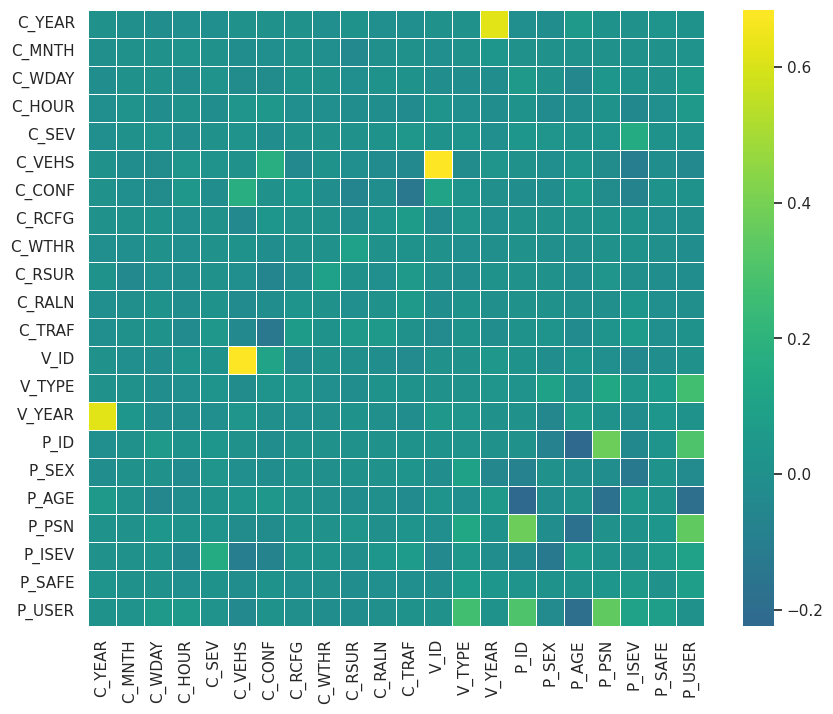

0

In [ ]:
get_corr_matrix(dataset = df, 
                metodo='pearson', size_figure=[10,8])

Vemos que ninguna de las variables está correlacionada con la objetivo en más de un 50%, lo cual no es necesario de primeras, eliminar ningun a variable del conjunto de datos que nos vaya a causar problemas.

In [ ]:
matriz_corr = df.corr()
matriz_corr

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
C_YEAR,1.000000,-0.001160,-0.014083,-0.007250,-0.005569,0.003287,0.002092,0.004983,-0.004438,0.016742,...,0.003941,0.006489,0.620925,-0.004826,-0.014039,0.056027,0.006948,0.004612,0.024473,0.008240
C_MNTH,-0.001160,1.000000,0.004106,0.019079,0.006092,-0.013385,-0.007744,0.003772,-0.007385,-0.041605,...,-0.009664,0.002812,0.032987,0.000130,0.002704,0.003949,0.005385,0.000497,0.000563,0.019206
C_WDAY,-0.014083,0.004106,1.000000,-0.013404,0.019216,-0.023380,-0.024506,0.010250,0.000750,-0.004799,...,-0.015317,-0.011869,-0.012523,0.052458,0.002477,-0.049379,0.032511,0.006923,0.003085,0.059669
C_HOUR,-0.007250,0.019079,-0.013404,1.000000,-0.019665,0.028429,0.046206,-0.010358,-0.010322,-0.019500,...,0.023847,-0.008848,-0.011099,0.014344,-0.027461,-0.019720,0.015675,-0.045649,-0.006455,0.050977
C_SEV,-0.005569,0.006092,0.019216,-0.019665,1.000000,0.019524,-0.012853,0.003454,0.004572,0.004327,...,0.011807,0.021570,-0.008520,0.032651,0.031102,0.013712,0.027921,0.155500,0.010242,0.018365
C_VEHS,0.003287,-0.013385,-0.023380,0.028429,0.019524,1.000000,0.172207,-0.039216,0.007235,-0.004191,...,0.684699,-0.024198,0.030280,0.004734,-0.008990,0.027331,-0.024673,-0.101552,-0.012005,-0.037735
C_CONF,0.002092,-0.007744,-0.024506,0.046206,-0.012853,0.172207,1.000000,0.034023,-0.013618,-0.057742,...,0.110480,0.022195,-0.002110,-0.016365,-0.011247,0.039212,-0.023200,-0.073020,0.007892,0.012552
C_RCFG,0.004983,0.003772,0.010250,-0.010358,0.003454,-0.039216,0.034023,1.000000,0.001504,-0.011949,...,-0.032277,0.029938,-0.006076,0.006589,0.004779,0.002199,0.011257,0.015352,-0.004870,-0.001115
C_WTHR,-0.004438,-0.007385,0.000750,-0.010322,0.004572,0.007235,-0.013618,0.001504,1.000000,0.089288,...,0.004678,-0.004133,-0.001794,0.004519,-0.000975,-0.003610,0.001333,0.006885,-0.001466,-0.012640
C_RSUR,0.016742,-0.041605,-0.004799,-0.019500,0.004327,-0.004191,-0.057742,-0.011949,0.089288,1.000000,...,-0.002593,-0.013188,0.008001,0.003519,0.001799,-0.021728,0.028086,-0.002035,-0.013191,-0.020327


In [ ]:
#Ordenamos las correlaciones de mayor a menor correlacion
#de la variable price con el resto de variables para 
#identificar las variables más correlacionadas con la misma:
#identificar las variables más correlacionadas con la misma:
matriz_corr["C_SEV"].sort_values(ascending=False)

C_SEV     1.000000
P_ISEV    0.155500
C_TRAF    0.043766
P_ID      0.032651
P_SEX     0.031102
P_PSN     0.027921
V_TYPE    0.021570
C_VEHS    0.019524
C_WDAY    0.019216
P_USER    0.018365
P_AGE     0.013712
V_ID      0.011807
P_SAFE    0.010242
C_RALN    0.009417
C_MNTH    0.006092
C_WTHR    0.004572
C_RSUR    0.004327
C_RCFG    0.003454
C_YEAR   -0.005569
V_YEAR   -0.008520
C_CONF   -0.012853
C_HOUR   -0.019665
Name: C_SEV, dtype: float64

Vemos que la mayoría de variables están correlacionadas con la variable objetivo positivamente, aunque no con valores elevados. Las más correlacionadas son: P_ISEV: Necesidad de asistencia médica,V_TYPE: Tipo de vehículo o P_SEX: hombre o mujer. Sin embargo, se puede apreciar que todos los valores exhiben una correlación en torno al 20%, lo cual sugiere que ninguna variable muestra una correlación significativa con la mortalidad de los accidentes de tráfico. Este hecho nos lleva a pensar  que ninguna de las variables registradas en el conjunto de datos tiene una influencia particularmente relevante para determinar la presencia de la mortalidad en un accidente de tráfico (ya sea el género, el día de la semana o el tipo de carretera, como se indica la DGT).


##5.3 Histograma de los datos
En primer lugar, representaremos los histogramas de tres de las variables que son de interés en el modelo y que están referidas con el momento en el que tuvo lugar la colisión. Éstas son: 'C_MNTH' (mes en el que tuvo lugar el accidente), 'C_WDAY' (día de la semana en el que tuvo lugar el accidente) y 'C_HOUR' (hora a la que tuvo lugar el accidente.

Veamos los resultados:

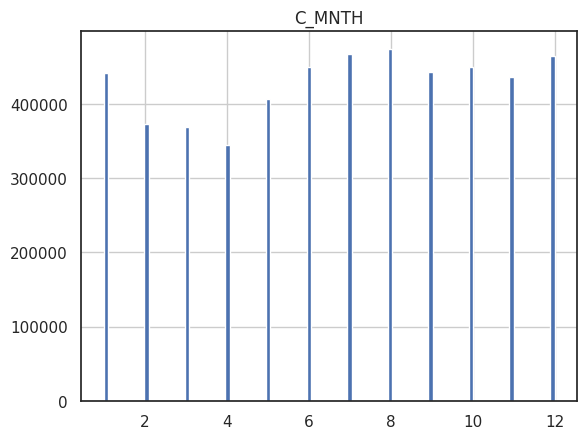

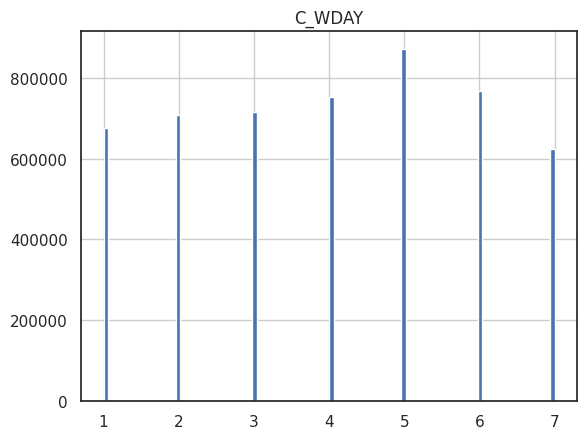

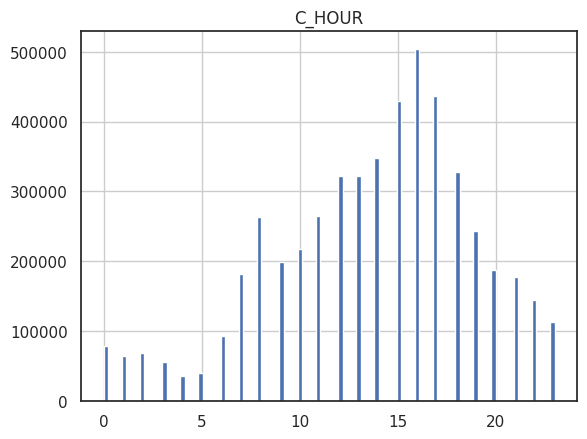

In [ ]:
columnas_interes =['C_MNTH','C_WDAY','C_HOUR']
for column in columnas_interes:
    x=df[column]
    fig, ax=plt.subplots()
    x.hist(bins=100)
    ax.set_title(column)
    plt.show()

Tras haber obtenido los gráficos podemos sacar algunas conclusiones: 
- En primer lugar, observamos que las épocas en las que se producen mayor cantidad de accidentes de tráficos, ya sean mortales o no, son en las fechas de verano y navidad, lo cual es lógico pues son las épocas del año donde hay una mayor movilidad de personas. 
- Por otro lado, observamos que los días de las semanas con mayor número de accidentes es acercándose el fin de semana, dato que ya veníamos prediciendo por el valor que hemos obtenido de la moda.
- En cuanto a las horas del dia, vemos que tampoco ocurre nada sorprendente, pues podemos observar que la mayor parte de los accidentes tienen lugar a las horas puntas del día.



Analizamos por otro lado, otro de los factores que defiende la DGT que es uno de los principales culpables de los accidentes de tráficos. Vamos a analizar si es cierto que las franjas de edad que registran una mayor mortalidad en accidentes de tráfico son las comprendidas entre los 35 y los 54 años.

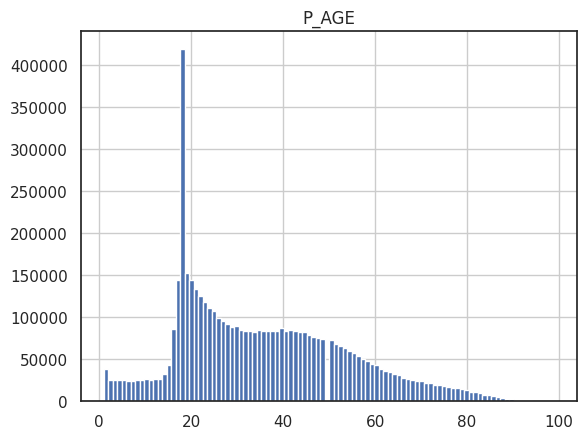

In [ ]:
columnas_interes =['P_AGE']
for column in columnas_interes:
    x=df[column]
    fig, ax=plt.subplots()
    x.hist(bins=100)
    ax.set_title(column)
    plt.show()

Mirando el gráfico, podemos concluir, que donde se producen un mayor número de accidentes mortales es entre  los 18 y 20 años, lo cual se puede deber fundamentalmente a la falta de experiencia al volante.

Podemos pensar, por lo tanto, que la hipótesis de la DGT es incorrecta, ya que la franja de edad entre los 35 y los 54 no son el grupo de edad que tienen un mayor número de accidentes, si embargo, puede ser que los accidentes que tienen los conductores novatos la sean menos graves y que no provoquen fallecidos.

## 5.4 Selección de variables
Debido a la gran cantidad de variables que tiene la base de datos, vamos a seleccionar qué variables son las que mejor pueden funcionar para resolver nuestro problema.
Haciendo uso de la matriz de correlaciones calculadas previamente, podemos observar qu existen variables que tienen una correlación elevada entre ellas, como por ejemplo son *C_YEAR* con *V_YEAR*, por lo que podríamos considerar eliminarlas de nuestra base de datos, además de no ser relevantes para el estudio del problema.
Asimismo tenemos también alta correlación con *V_ID* y *P_PSN* ya que las dos recogen información bastante similar. Decidimos quedarnos con *P_PSN* que recoge información más detallada sobre el accidente.

Por otro lado, podemos eliminar *P_ID* ya que se corresponde al número de identificación del afectado y tampoco resulta de gran relevancia en nuestro problema, al igual que *P_ISEV* ya que se corresponde con la asistencia médica al afectado, mientras que nosotros estamos evaluando los accidentes con víctimas mortales.



In [ ]:
df = df.drop(['C_YEAR', 'V_YEAR' ,'V_ID','P_ID','P_ISEV'], axis='columns')
df

,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_TYPE,P_SEX,P_AGE,P_PSN,P_SAFE,P_USER
0,1,1,20,0,2,34,2,1,5,3,3,6,1,41,11,2,1
1,1,1,20,0,2,34,2,1,5,3,3,1,1,19,11,2,1
2,1,1,20,0,2,34,2,1,5,3,3,1,0,20,13,2,2
3,1,1,8,0,1,1,2,5,3,6,18,1,1,46,11,2,1
5,1,1,17,0,3,80,80,1,2,1,1,1,1,28,11,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860380,12,7,19,0,1,3,1,1,3,4,18,1,0,15,21,2,2
5860401,8,5,23,0,1,6,5,1,1,1,18,14,1,29,96,9,5
5860402,8,5,14,0,1,2,1,1,5,4,18,1,0,18,11,1,1
5860403,8,5,22,1,1,6,1,2,4,80,18,22,1,67,12,1,1


Antes de relizar la división de los datos en entrenamiento y test, vamos a guardar la base de datos con los cambios realizados hasta ahora.

In [ ]:
df.to_csv('df_procesado',sep='\t')

# **6. DIVISIÓN DE LOS DATOS**
Ahora pasamos ya a analizar cómo de bueno es nuestro modelo. Para ello, en primer lugar, dividimos la muestra en el conjunto de datos de entrenamiento y de test, para luego evaluar con ellos las diferentes métricas que vamos a usar.

In [ ]:
from sklearn.model_selection import train_test_split

x = df.drop(['C_SEV'],axis=1)
Y = df['C_SEV']
X_train, X_test, y_train, y_test = train_test_split(x,Y,test_size = 0.01, random_state = 42)

train_df = pd.concat([X_train, y_train],axis=1)
test_df = pd.concat([X_test, y_test],axis=1)

X_train.shape, X_test.shape

((5065213, 16), (51164, 16))

Ahora volvemos a guardar la base de datos para usarlo posteriormente en el trabajo.

In [ ]:
df_test = X_test.copy()
df_test['C_SEV']=y_test

# **7. PROBLEMA DESBALANCEO**

In [ ]:
#Como hemos visto anteriormente, los datos están distribuidos de la siguiente forma
fig = px.histogram(pd_plot_C_SEV_pc, x="index", y=['percent'])
fig.show()

Para obtener posteriormente buenos resultados con esta base de datos, es importante que tratemos este problema. Lo haremos mediante undersampling debido a la gran cantidad de datos que contiene la base.

In [ ]:
from collections import Counter
import imblearn
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
print(Counter(y_train))

Counter({0: 4979743, 1: 85470})


In [ ]:
undersample = RandomUnderSampler(random_state = 1)
X_over, y_over = undersample.fit_resample(X_train, y_train)
print(Counter(y_over))

Counter({0: 85470, 1: 85470})


In [ ]:
df_over= X_over.copy()
df_over['C_SEV']= y_over

Text(0, 0.5, 'Numero de casos')

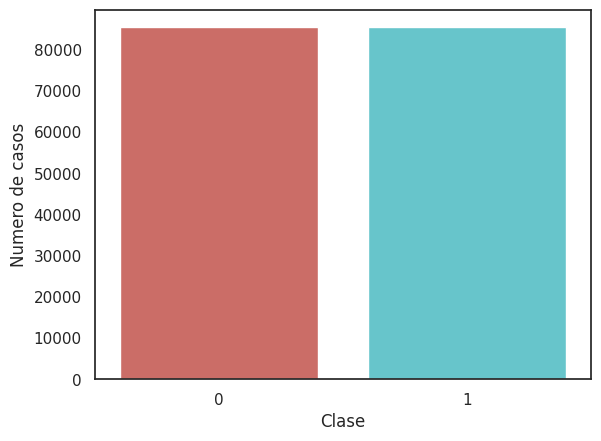

In [ ]:
#Comprobamos que ahora los datos sí están balanceados
plt.figure() 
sns.countplot(x='C_SEV',data=df_over,palette='hls') 
plt.xlabel('Clase')
plt.ylabel('Numero de casos')

*Nota: ahora procedemos a concluir la primera parte del trabajo. Nuestra idea era hacerlo todo en un mismo cuaderno, pero al ejecutarlo, la memoria RAM se llenaba y esto hacía imposible ejecutar todo el código. Por ello hemos decidido guardar la base de datos con los cambios hechos hasta aquí y así proceder en otro cuaderno con el resto del trabajo.*

In [ ]:
df_over.to_csv('df_procesado_train', sep='\t')
df_test.to_csv('df_procesado_test',sep='\t')